In [170]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
plt.style.use('ggplot')

In [172]:
email_df = pd.read_csv('./data/phishing_all_data.csv')

In [173]:
email_df.shape

(27416, 2)

In [174]:
email_df.isna().sum()

content     0
phishing    0
dtype: int64

In [175]:
email_df['phishing'].value_counts()

False    17787
True      9629
Name: phishing, dtype: int64

In [176]:
phishing_df = email_df[email_df['phishing']]
ham_df = email_df[~email_df['phishing']]

In [178]:
phishing_data_len = phishing_df.shape[0]
phishing_word_dict = {}
for text in phishing_df['content']:
    alpha_only_text = re.sub(r'[^a-zA-Z\s]', '', text)
    word_list = list(set(alpha_only_text.lower().split(' ')))
    for word in word_list:
        if word in phishing_word_dict:
            phishing_word_dict[word] += 1
        else:
            phishing_word_dict[word] = 1

In [179]:
phish_word_count_list = []
for key, value in phishing_word_dict.items():
    word_percentage = value/phishing_data_len * 100
    phish_word_count_list.append([key, value, word_percentage])
phish_word_count_list.sort(key=lambda x: x[1], reverse=True)

In [180]:
phish_word_count_df = pd.DataFrame(phish_word_count_list, columns=['word', 'phish_count', 'phish_percentage'])

In [181]:
phish_word_count_df[phish_word_count_df['phish_percentage'] > 25][:]

,word,phish_count,phish_percentage
0,,8593,89.240835
1,to,8217,85.335964
2,you,7864,81.669955
3,the,7717,80.143317
4,and,7671,79.665594
...,...,...,...
65,only,2482,25.776301
66,name,2454,25.485513
67,transaction,2438,25.319348
68,more,2428,25.215495


In [182]:
ham_data_len = ham_df.shape[0]
ham_word_dict = {}
for text in ham_df['content']:
    alpha_only_text = re.sub(r'[^a-zA-Z\s]', '', text)
    word_list = list(set(alpha_only_text.lower().split(' ')))
    for word in word_list:
        if word in ham_word_dict:
            ham_word_dict[word] += 1
        else:
            ham_word_dict[word] = 1

In [183]:
ham_word_count_list = []
for key, value in ham_word_dict.items():
    word_percentage = value/ham_data_len * 100
    ham_word_count_list.append([key, value, word_percentage])
ham_word_count_list.sort(key=lambda x: x[1], reverse=True)

In [184]:
ham_word_count_df = pd.DataFrame(ham_word_count_list, columns=['word', 'ham_count', 'ham_percentage'])

In [185]:
word_count_df = pd.merge(left=ham_word_count_df, right=phish_word_count_df, how='outer', on='word')
word_count_df.fillna(0, inplace=True)

In [186]:
word_count_df['phish_to_ham_ratio'] = word_count_df['phish_percentage']/word_count_df['ham_percentage']

In [187]:
filtered_df = word_count_df.sort_values('phish_to_ham_ratio', ascending=False)[
    ((word_count_df['phish_percentage'] >= 25) |
    (word_count_df['ham_percentage'] >= 10)) &
    ((word_count_df['phish_to_ham_ratio'] >= 10) |
    (word_count_df['phish_to_ham_ratio'] <= 0.1))
]
filtered_df

/var/folders/t9/4whyp65x6cqg_kdhc89_f_080000gn/T/ipykernel_9752/964490342.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = word_count_df.sort_values('phish_to_ham_ratio', ascending=False)[


,word,ham_count,ham_percentage,phish_count,phish_percentage,phish_to_ham_ratio
3997,transaction,35.0,0.196773,2438.0,25.319348,128.672926
1483,bank,113.0,0.635295,3358.0,34.873819,54.893860
717,account,232.0,1.304323,4099.0,42.569322,32.637092
750,dear,223.0,1.253725,2737.0,28.424551,22.672085
574,million,287.0,1.613538,3002.0,31.176654,19.321921
406,money,379.0,2.130770,3731.0,38.747533,18.184759
508,contact,311.0,1.748468,3014.0,31.301277,17.902116
328,business,464.0,2.608647,3297.0,34.240316,13.125700
368,name,419.0,2.355653,2454.0,25.485513,10.818874
172,please,791.0,4.447068,4324.0,44.906013,10.097892


In [188]:
highlighted_df = filtered_df.head(10)

In [189]:
word_count_df[word_count_df['phish_percentage'] > 50].tail(50)

,word,ham_count,ham_percentage,phish_count,phish_percentage,phish_to_ham_ratio
0,,9945.0,55.911621,8593.0,89.240835,1.596105
1,to,9063.0,50.952943,8217.0,85.335964,1.674800
2,the,8275.0,46.522741,7717.0,80.143317,1.722670
3,a,7186.0,40.400292,7061.0,73.330564,1.815100
4,and,7182.0,40.377804,7671.0,79.665594,1.973005
5,i,6866.0,38.601226,4847.0,50.337522,1.304039
6,you,6401.0,35.986957,7864.0,81.669955,2.269432
7,of,6298.0,35.407882,7427.0,77.131582,2.178373
8,in,6268.0,35.239220,6941.0,72.084329,2.045571
9,for,6218.0,34.958115,7273.0,75.532246,2.160650


In [190]:
word_count_df[word_count_df['word'] == 'urgent']

,word,ham_count,ham_percentage,phish_count,phish_percentage,phish_to_ham_ratio
2810,urgent,55.0,0.309215,1224.0,12.7116,41.109316


In [192]:
regex_search_string = 'http'
phish_match = phishing_df[phishing_df['content'].str.contains(regex_search_string, case=False, na=False)]
ham_match = ham_df[ham_df['content'].str.contains(regex_search_string, case=False, na=False)]
phish_match_percent = phish_match.shape[0] / phishing_df.shape[0] * 100
ham_match_percent = ham_match.shape[0] / ham_df.shape[0] * 100
print(f'Matches with {phish_match_percent}% phishing emails and {ham_match_percent}% ham emails')

Matches with 39.26679821372936% phishing emails and 27.047843930960813% ham emails


In [193]:
highlighted_df.sort_values(by='phish_percentage', ascending=False, inplace=True)

/var/folders/t9/4whyp65x6cqg_kdhc89_f_080000gn/T/ipykernel_9752/4132846668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlighted_df.sort_values(by='phish_percentage', ascending=False, inplace=True)


In [194]:
highlighted_df.drop(columns=['ham_count', 'phish_count', 'phish_to_ham_ratio'], inplace=True)

/var/folders/t9/4whyp65x6cqg_kdhc89_f_080000gn/T/ipykernel_9752/2404522933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlighted_df.drop(columns=['ham_count', 'phish_count', 'phish_to_ham_ratio'], inplace=True)


In [195]:
plot_df = pd.melt(highlighted_df, id_vars="word", var_name="email_type", value_name="percentage")

In [196]:
plot_df.rename({'email_type': 'Email Type'}, axis=1, inplace=True)

In [197]:
plot_df

,word,Email Type,percentage
0,please,ham_percentage,4.447068
1,account,ham_percentage,1.304323
2,money,ham_percentage,2.130770
3,bank,ham_percentage,0.635295
4,business,ham_percentage,2.608647
5,contact,ham_percentage,1.748468
6,million,ham_percentage,1.613538
7,dear,ham_percentage,1.253725
8,name,ham_percentage,2.355653
9,transaction,ham_percentage,0.196773


In [198]:
plot_df['Email Type'] = np.where(plot_df['Email Type'] == 'phish_percentage', 'Phishing', 'Ham')

In [199]:
plot_df.sort_values(by='percentage', ascending=False, inplace=True)

<Figure size 100000x200000 with 0 Axes>

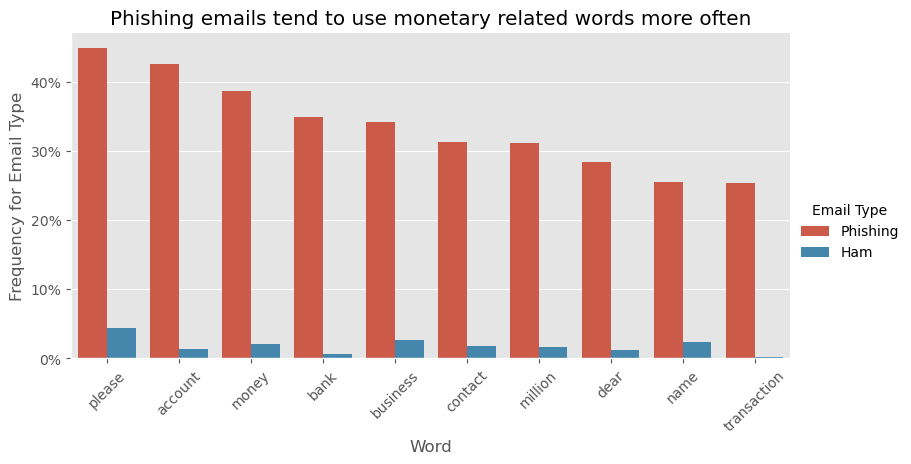

In [200]:
plt.figure(figsize=(1000,2000))
snsplot = sns.catplot(
    data=plot_df,
    kind='bar',
    x='word',
    y='percentage',
    hue='Email Type',
    height=4,
    aspect=2,
)
plt.title('Phishing emails tend to use monetary related words more often')
plt.xlabel('Word')
plt.ylabel('Frequency for Email Type')
plt.xticks(rotation=45)
y_ticks = [0, 10, 20, 30, 40]
y_labels = [f'{i}%' for i in x_ticks]
plt.yticks(ticks=y_ticks, labels=y_labels)
plt.show()
snsplot.fig.savefig('word_frequency', bbox_inches="tight")